In [1]:
import pandas as pd 
import numpy as np

In [2]:
x=pd.read_csv("C:\\Users\\sumeera\\Desktop\\data science\\dataset\\Computer.csv")
x.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [4]:
x['premium'].value_counts()

yes    5647
no      612
Name: premium, dtype: int64

In [31]:
x = pd.get_dummies(x,drop_first=True)

In [32]:
x.head()

,price,speed,hd,ram,screen,ads,trend,cd_yes,multi_yes,premium_yes
0,1499,25,80,4,14,94,1,0,0,1
1,1795,33,85,2,14,94,1,0,0,1
2,1595,25,170,4,15,94,1,0,0,1
3,1849,25,170,8,14,94,1,0,0,0
4,3295,33,340,16,14,94,1,0,0,1


In [33]:
a = x.drop(['premium_yes'],axis=1)
b=x['premium_yes']

In [34]:
frad = x[x['premium_yes']==1]
target = x[x['premium_yes']==0]

In [35]:
print(frad.shape,target.shape)

(5647, 10) (612, 10)


In [36]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [37]:
from imblearn.combine import SMOTETomek

In [38]:
smk = SMOTETomek(random_state =123)
x_bal , y_bal = smk.fit_sample(a,b)


In [39]:
a.shape

(6259, 9)

In [40]:
b.shape

(6259,)

In [41]:
print(frad.shape,target.shape)

(5647, 10) (612, 10)


In [42]:
print(x_bal.shape,y_bal.shape)

(11228, 9) (11228,)


In [43]:
from collections import Counter

In [44]:
# print('orginal'.format(Counter(b)))

In [45]:
print('Original dataset shape {}'.format(Counter(b)))
print('Resampled dataset shape {}'.format(Counter(y_bal)))

Original dataset shape Counter({1: 5647, 0: 612})
Resampled dataset shape Counter({1: 5614, 0: 5614})


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [47]:
clf = DecisionTreeClassifier()
clf.fit(x_bal,y_bal)

DecisionTreeClassifier()

In [48]:
x_test,x_train,y_test,y_train = train_test_split(x_bal,y_bal,test_size=0.25,random_state=123)

In [122]:
clff = DecisionTreeClassifier(max_depth=8,min_samples_leaf=15,max_leaf_nodes=5,max_features=9)
clff.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, max_features=9, max_leaf_nodes=5,
                       min_samples_leaf=15)

In [123]:
from sklearn.metrics import classification_report , confusion_matrix

In [124]:
y_pred = clff.predict(x_test)

In [125]:
print(confusion_matrix(y_test,y_pred))

[[3368  849]
 [ 767 3437]]


In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      4217
           1       0.80      0.82      0.81      4204

    accuracy                           0.81      8421
   macro avg       0.81      0.81      0.81      8421
weighted avg       0.81      0.81      0.81      8421



[Text(418.5, 489.24, 'X[7] <= 0.5\ngini = 0.5\nsamples = 2807\nvalue = [1397, 1410]'),
 Text(279.0, 380.52000000000004, 'X[6] <= 8.5\ngini = 0.452\nsamples = 2036\nvalue = [1333, 703]'),
 Text(139.5, 271.8, 'gini = 0.423\nsamples = 385\nvalue = [117, 268]'),
 Text(418.5, 271.8, 'X[3] <= 3.0\ngini = 0.388\nsamples = 1651\nvalue = [1216, 435]'),
 Text(279.0, 163.08000000000004, 'gini = 0.0\nsamples = 59\nvalue = [0, 59]'),
 Text(558.0, 163.08000000000004, 'X[2] <= 424.5\ngini = 0.361\nsamples = 1592\nvalue = [1216, 376]'),
 Text(418.5, 54.360000000000014, 'gini = 0.297\nsamples = 1357\nvalue = [1111, 246]'),
 Text(697.5, 54.360000000000014, 'gini = 0.494\nsamples = 235\nvalue = [105, 130]'),
 Text(558.0, 380.52000000000004, 'gini = 0.152\nsamples = 771\nvalue = [64, 707]')]

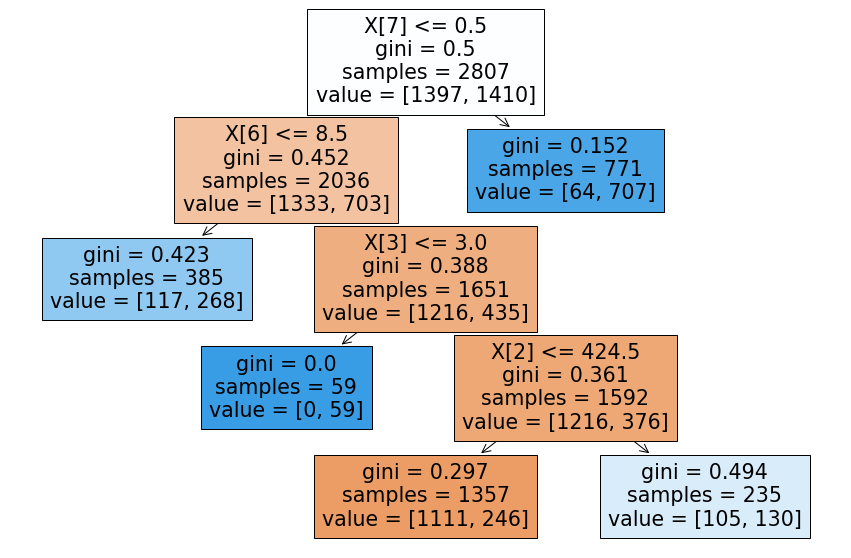

In [127]:
import matplotlib.pyplot as plt
from sklearn import tree 
plt.figure(figsize=(15,10))
tree.plot_tree(clff, filled =True)

In [128]:
from sklearn.model_selection import GridSearchCV

In [107]:
params = {
    "max_depth":[7,8,9],
    "max_leaf_nodes":[4,5,6],
    "min_samples_leaf":[10,12,14]
}

In [108]:
gs = GridSearchCV(param_grid=params,cv=6,estimator=clf,scoring="accuracy")

In [109]:
gs.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [7, 8, 9], 'max_leaf_nodes': [4, 5, 6],
                         'min_samples_leaf': [10, 12, 14]},
             scoring='accuracy')

In [110]:
gs.best_params_

{'max_depth': 7, 'max_leaf_nodes': 6, 'min_samples_leaf': 10}

In [130]:
path = clff.cost_complexity_pruning_path(x_train, y_train)
path

{'ccp_alphas': array([0.        , 0.01974087, 0.02364921, 0.04163373, 0.13023356]),
 'impurities': array([0.28473192, 0.30447279, 0.32812199, 0.36975572, 0.49998928])}

In [131]:
ccp_alphas , impurities = path.ccp_alphas,path.impurities

In [134]:
clfs=[]
for cc_a in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=cc_a)
    clf.fit(x_train,y_train)
    clfs.append(clf)

In [135]:
train_s = [clf.score(x_train,y_train) for clf in clfs]
test_s =[clf.score(x_test,y_test)for clf in clfs]

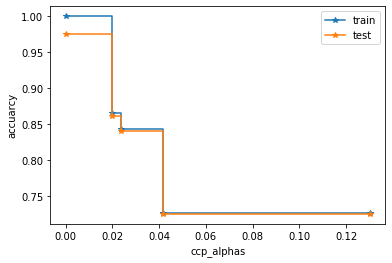

In [138]:
plt.xlabel("ccp_alphas")
plt.ylabel("accuarcy")
plt.plot(ccp_alphas,train_s,marker="*",label="train",drawstyle='steps-post')
plt.plot(ccp_alphas,test_s,marker='*',label="test",drawstyle='steps-post')
plt.legend()

In [144]:
clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0.04)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.04, random_state=0)

In [145]:
prd = clf.predict(x_test)

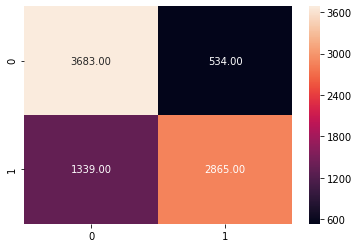

In [146]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,prd),annot=True,fmt='.2f')

[Text(334.79999999999995, 679.5, 'X[7] <= 0.5\ngini = 0.5\nsamples = 2807\nvalue = [1397, 1410]'),
 Text(223.2, 407.69999999999993, 'X[6] <= 8.5\ngini = 0.452\nsamples = 2036\nvalue = [1333, 703]'),
 Text(111.6, 135.89999999999998, 'gini = 0.423\nsamples = 385\nvalue = [117, 268]'),
 Text(334.79999999999995, 135.89999999999998, 'gini = 0.388\nsamples = 1651\nvalue = [1216, 435]'),
 Text(446.4, 407.69999999999993, 'gini = 0.152\nsamples = 771\nvalue = [64, 707]')]

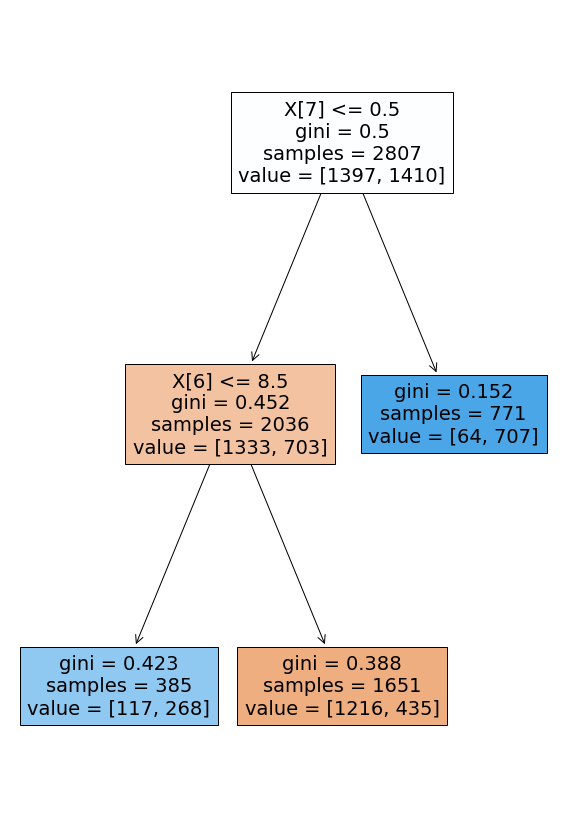

In [147]:
plt.figure(figsize=(10,15))
tree.plot_tree(clf,filled=True)

In [148]:
print(classification_report(y_test,prd))

              precision    recall  f1-score   support

           0       0.73      0.87      0.80      4217
           1       0.84      0.68      0.75      4204

    accuracy                           0.78      8421
   macro avg       0.79      0.78      0.78      8421
weighted avg       0.79      0.78      0.78      8421



In [ ]:
from